# <center> Project - Car Plate Detection with OpenCV and TesseractOCR

### <center> Detect, recognize and extract car license plate numbers with the power of computer vision 

## (i) OpenCV

OpenCV is an open source computer vision and machine learning software library

<b>Install the Python version of OpenCV (Open Source Computer Vision Library) <b> 

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


## (ii) Haar Cascade XML File

Besides the installation of the OpenCV library, another important thing to retrieve is the Haar Cascade XML file.

The object detection technique using Haar feature-based cascade classifiers.
It is a machine learning based approach (involving AdaBoost) where a cascade
function is trained from many positive and negative images.

OpenCV actually comes with pre-trained XML files of various Haar Cascades, where each XML file contains the feature set. We will be using the Haar Cascade XML file containing the features for Russian car plates

**1**. Go to link https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml

**2**. Right click on the screen (which should be displaying a wall of text with the top line being <?xml version=”1.0"?>), and click ‘Save as..’

**3**.In the Save option pop-up, you should see the default file name of ‘haarcascade_russian_plate_number’ and file type ‘XML document’. Leave them as the default, and save this XML file in the path where your Jupyter notebook is located.
   
To explore other XML files available for experimentation, check out the OpenCV Haar Cascades GitHub resource here(https://github.com/opencv/opencv/tree/master/data/haarcascades). If you would like to find out more about the theory of Haar Cascade, visit the OpenCV tutorial here(https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html).

## (iii) TesseractOCR

TesseractOCR is an open source optical character recognition (OCR) engine

<ins>Instructions for **installing TesseractOCR** (for Windows)<ins> :
    
**1**.Install the TesseractOCR application using the Windows installer available at: https://github.com/UB-Mannheim/tesseract/wiki. At the point of this project, I downloaded the 11 Aug 2021 (64 bit) version (tesseract-ocr-w64-setup-v5.0.0-alpha.20210811.exe)

**2**.Run the downloaded installer and take note of where the application is installed. For me, I installed it inside folder **C:\Program Files\Tesseract-OCR** . We will be using this folder path later on, and this is important because we will need to point directly to the tesseract.exe inside the folder.

**3**.Install the Python version of TesseractOCR (i.e. PyTesseract) in your environment with the following command:

In [6]:
pip install pytesseract

  Using cached pytesseract-0.3.8.tar.gz (14 kB)
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14067 sha256=3187a2cf90c938513b6ee6e0702b08b1cd24d70d19607536665fc62e314c9fde
  Stored in directory: c:\users\guilh\appdata\local\pip\cache\wheels\ed\8a\c6\40c7ec06c2dd3df636832537238128a1471bf9c1b6a3a9bf40
Successfully built pytesseract
Note: you may need to restart the kernel to use updated packages.


<b>The above dependencies can then be initialized with the following code:<b>

In [2]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt


#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline
import cv2 # This is the OpenCV Python library
import pytesseract # This is the TesseractOCR Python library
# Set Tesseract CMD path to the location of tesseract.exe file
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# A) Car Plate Detection with OpenCV and Haar Cascade

First of all, we import the input car image we want to work with.
Because OpenCV imports images as BGR (Blue-Green-Red) format by default, <br>
we will need to **run cv2.cvtColor** to switch it to RGB format before we ask matplotlib to display the image.

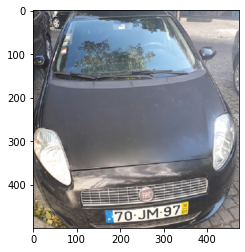

In [1176]:
# Read car image and convert color to RGB
carplate_img = cv2.imread('C:\\Users\\guilh\\Projects2021_gui\\1.Car Plate Detection\\Code\\images\\car_image5.png')

# switch image to RGB format
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)

#display image using matplotlib
plt.imshow(carplate_img_rgb)

It’s now time to bring in the Haar Cascade feature set (XML file) for Russian car plates,
with the use of OpenCV’s CascadeClassifier function.

In [1177]:
# Import Haar Cascade XML file for Russian car plate numbers

#absolute path
#carplate_haar_cascade = cv2.CascadeClassifier('C:\\Users\\guilh\\Projects2021_gui\\1.Car Plate Detection\\Code/haarcascade_russian_plate_number.xml')

#relative path
carplate_haar_cascade = cv2.CascadeClassifier('./haarcascade_russian_plate_number.xml')
#Note: If the path above is relative and i made a mistake use the absolute path to avoid human error!!!

Next we make use of the detectMultiScale method of the CascadeClassifier to run the detection.

In [1178]:
# Setup function to detect car plate
def carplate_detect(image):
    carplate_overlay = image.copy() 
    
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=7)
    
    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) #the last digit is how thick the retangle, the last tupple is the color of the rectangle in RGB decimal code ex BLue (0,0,255) Red (255,0,0)
    return carplate_overlay

- x-coordinate of bottom-left corner of rectangle (x)
- y-coordinate of bottom-left corner of rectangle (y)
- width of rectangle (w)
- height of rectangle (h)

Let’s now run our function for car plate detection:

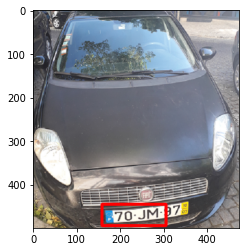

In [1179]:
detected_carplate_img = carplate_detect(carplate_img_rgb)
plt.imshow(detected_carplate_img)

# B) Plate Number Recognition and Extraction with TesseractOCR

##  (i) Extract car license plate and enlarge image

In order to ensure the success of the OCR function, we need to perform a series of image processing steps. Let’s start by isolating the car license plate as an image. We do that by setting up a function similar to what we have done earlier with car plate detection, just that this time we will be extracting and returning the region of interest (car plate) as a new image.

In [1251]:
# Create function to retrieve only the car plate region itself
def carplate_extract(image):
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=7)
    for x,y,w,h in carplate_rects: 
        carplate_img = image[y+2:y+h-9 ,x+30:x+w+40] # Adjusted to extract specific region of interest i.e. car license plate
    return carplate_img

**NOTE (Gui):** $\color{green}{\text{I had to change : y+15 to y+2,y+h-10 to y+h-9, x+15 to x+30 and x+w-20 to x+w+40 }}$to get only characters/digits of the plate and not extra because of space on the side of the image!!! IMPORTANT ZOOM ONLY THE AREA WITH THE PLATE characters/digits
MORE THE RECTANGLE IS TIGHTLY ARROUND THE DIGITS/CHARACTERS better should be the output of image to string!!!

In addition, we will also want to enlarge our car license plate (using OpenCV’s resizemethod) since it was only a small segment of the original input image.

In [1252]:
# Enlarge image for further processing later on
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

Running these two functions will give us our region of interest, which is the car license plate itself (termed as carplate_extract_img).

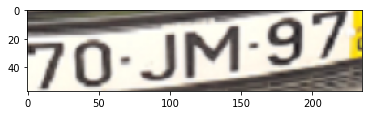

In [1253]:
# Display extracted car license plate image
carplate_extract_img = carplate_extract(carplate_img_rgb)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
plt.imshow(carplate_extract_img);

## (ii) Convert to gray-scale

Next up is to convert the image from RGB color to grayscale. The purpose of this is to decrease the amount of colors in the image, which may interfere with the OCR detection. This is because we want to focus on the important edges and shapes of the image, and converting to grayscale helps to optimize this detection process.

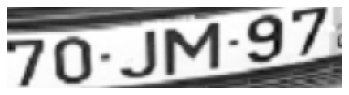

In [1254]:
# Convert image to grayscale
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
plt.axis('off') 
plt.imshow(carplate_extract_img_gray, cmap = 'gray');

## (iii) Smoothing (aka blurring or de-noising)

Next, we apply smoothing on the image. The smoothing technique helps to get rid of noise, and makes the application focus on the general details of the image. This is essentially what we call a ‘de-noising’ step, where it makes the text characters in the image more distinct and recognizable.

I used median blur for the smoothing (usingcv2.medianBlur), which computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. For this project, I discovered that median blur was particular effective (definitely more so than Gaussian blur), and therefore median blur was demonstrated here.

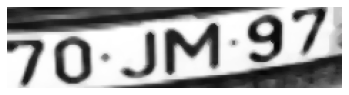

In [1257]:
# Apply median blur
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,5) # kernel size 5 to work in my plate
plt.axis('off') 
plt.imshow(carplate_extract_img_gray_blur, cmap = 'gray');

The visual difference is perhaps subtle, but if you were to compare the two images closely, you will notice that the edges of the characters are slightly smoother and less jagged. After these transformations, our image is now ready for OCR application. For other images, if higher degree of smoothing is required, you can always increase the kernel size from the size 3 I used here. Let’s pass the image into the PyTesseract image_to_string function:

In [1258]:
# Display the text extracted from the car plate
print(pytesseract.image_to_string(carplate_extract_img_gray_blur, 
                                  config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

70JM97



**NOTE:** output is $\color{green}{\text{right output }}$!!!!